In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
filename = "USvideos.csv"
df = pd.read_csv(filename)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [46]:
df['like_rate'] =  df ['likes'] / df['views'] * 100
df['dislike_rate'] =  df ['dislikes'] / df['views'] * 100
df['like_ratio'] =  df ['dislikes'] / df['likes'] * 100
#Start building dataset of most disliked trending YouTube videos
disliked = df['like_ratio'] > 80
dis_df = df[disliked]
print(dis_df.shape)
print(df.shape)
dis_df.head()

(760, 20)
(40949, 20)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,like_ratio
43,0tO_l_Ed5Rs,17.14.11,Matthew Santoro - FACTS (Official Music Video)...,MatthewSantoro,10,2017-11-11T16:00:01.000Z,"matthew santoro facts|""music video""|""matthew s...",328330,15186,15448,7484,https://i.ytimg.com/vi/0tO_l_Ed5Rs/default.jpg,False,False,False,LISTEN WITH HEADPHONES! 🎧. WATCH IN 4K! 👀\nPro...,Music,4.625225,4.705022,101.725273
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN,Sport,0.210946,0.253616,120.228061
75,k8NxqyGcZA4,17.14.11,Rosie O’Donnell On Donald Trump’s Hostility To...,Watch What Happens Live with Andy Cohen,24,2017-11-10T12:59:55.000Z,"What What Happens live|""reality""|""interview""|""...",238643,2429,5381,2325,https://i.ytimg.com/vi/k8NxqyGcZA4/default.jpg,False,False,False,Rosie O’Donnell doesn’t hold back about Donald...,Entertainment,1.017838,2.254833,221.531494
133,X7flefV8tec,17.14.11,"President Bill Clinton On Dictators, Democracy...",Team Coco,24,2017-11-09T02:37:49.000Z,[none],366180,4364,4448,1997,https://i.ytimg.com/vi/X7flefV8tec/default.jpg,False,False,False,#ConanNYC Highlight: President Clinton talks a...,Entertainment,1.191764,1.214703,101.924840
169,bhoFXkVy8JA,17.14.11,Basmati Blues - Trailer,Blockbuster,1,2017-10-13T08:20:03.000Z,"Blockbuster|""blockbuster.dk""|""blockbuster.se""|...",12609,40,79,17,https://i.ytimg.com/vi/bhoFXkVy8JA/default.jpg,False,False,False,Basmati Blues - Trailer,Film and Animation,0.317234,0.626537,197.500000


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words = 'english').fit(dis_df['title'])
bag_of_words = vec.transform(dis_df['title'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
freq_dis_titles = words_freq[:5]
top_disliked_titles = []
for a_tuple in freq_dis_titles:
    top_disliked_titles.append(a_tuple[0])
print(top_disliked_titles)

['trump', '2018', 'president', 'march', 'news']


In [48]:
# Likewise for the tags - we notice a lot has to do with Trump, the superbowl, and the news
vec1 = CountVectorizer(stop_words = 'english').fit(dis_df['tags'])
bag_of_words = vec1.transform(dis_df['tags'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
freq_dis_tags = words_freq[:5]
top_disliked_tags = []
for a_tup in freq_dis_tags:
    top_disliked_tags.append(a_tup[0])
print(top_disliked_tags)

['news', 'trump', 'video', 'donald', 'today']


In [49]:
# Create a new dataframe with only the most disliked videos
df1 = dis_df[['category_id', 'views', 'title', 'tags', 'comment_count', 'likes', 'dislikes']].copy()
df1.head()
print(df1.shape)

(760, 7)


In [50]:
for x in top_disliked_titles:
    #df1[x] = ""
    df1[x] = np.where(df1['title'].str.contains(x), 1, 0)
df1.head()

,category_id,views,title,tags,comment_count,likes,dislikes,trump,2018,president,march,news
43,10,328330,Matthew Santoro - FACTS (Official Music Video)...,"matthew santoro facts|""music video""|""matthew s...",7484,15186,15448,0,0,0,0,0
47,17,956169,Stephon Marbury and Jimmer Fredette fight in C...,"NBA|""Basketball""|""Sports""",1447,2017,2425,0,0,0,0,0
75,24,238643,Rosie O’Donnell On Donald Trump’s Hostility To...,"What What Happens live|""reality""|""interview""|""...",2325,2429,5381,0,0,0,0,0
133,24,366180,"President Bill Clinton On Dictators, Democracy...",[none],1997,4364,4448,0,0,0,0,0
169,1,12609,Basmati Blues - Trailer,"Blockbuster|""blockbuster.dk""|""blockbuster.se""|...",17,40,79,0,0,0,0,0


In [51]:
# Do the same for the tags
for x in top_disliked_tags:
    df1["tag_"+x] = np.where(df1['title'].str.contains(x), 1, 0)
df1.head()

,category_id,views,title,tags,comment_count,likes,dislikes,trump,2018,president,march,news,tag_news,tag_trump,tag_video,tag_donald,tag_today
43,10,328330,Matthew Santoro - FACTS (Official Music Video)...,"matthew santoro facts|""music video""|""matthew s...",7484,15186,15448,0,0,0,0,0,0,0,0,0,0
47,17,956169,Stephon Marbury and Jimmer Fredette fight in C...,"NBA|""Basketball""|""Sports""",1447,2017,2425,0,0,0,0,0,0,0,0,0,0
75,24,238643,Rosie O’Donnell On Donald Trump’s Hostility To...,"What What Happens live|""reality""|""interview""|""...",2325,2429,5381,0,0,0,0,0,0,0,0,0,0
133,24,366180,"President Bill Clinton On Dictators, Democracy...",[none],1997,4364,4448,0,0,0,0,0,0,0,0,0,0
169,1,12609,Basmati Blues - Trailer,"Blockbuster|""blockbuster.dk""|""blockbuster.se""|...",17,40,79,0,0,0,0,0,0,0,0,0,0


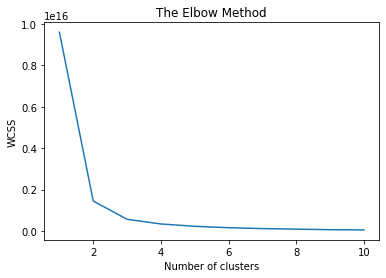

In [53]:
# Start clustering - use Elbow Method to find that the best cluster looks to be around 3
from sklearn.cluster import KMeans
cluster = df1[['category_id', 'views', 'comment_count', 'likes', 'dislikes', 'trump', '2018', 'march', 'president', 'news', 'tag_news', 'tag_video', 'tag_trump', 'tag_today', 'tag_donald']]
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

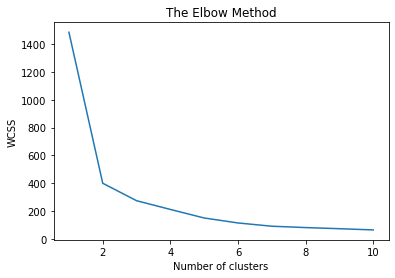

In [107]:
#Use test to use df - which is all of the Trending videos where df1 are only the disliked ones

subset = df[['category_id', 'views', 'comment_count', 'likes', 'dislikes']]
test = subset.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [142]:
# Data fitting for kmeans
kmeans = KMeans(n_clusters = 3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit(cluster)
y_kmeans1 = kmeans.fit_predict(cluster)
df1['cluster'] = y_kmeans1
print(df1.shape)
df1.head()

(760, 20)


,category_id,views,title,tags,comment_count,likes,dislikes,trump,2018,president,march,news,tag_news,tag_trump,tag_video,tag_donald,tag_today,cluster,category_name,test
43,10,328330,Matthew Santoro - FACTS (Official Music Video)...,"matthew santoro facts|""music video""|""matthew s...",7484,15186,15448,0,0,0,0,0,0,0,0,0,0,1,Music,2
47,17,956169,Stephon Marbury and Jimmer Fredette fight in C...,"NBA|""Basketball""|""Sports""",1447,2017,2425,0,0,0,0,0,0,0,0,0,0,1,Sport,1
75,24,238643,Rosie O’Donnell On Donald Trump’s Hostility To...,"What What Happens live|""reality""|""interview""|""...",2325,2429,5381,0,0,0,0,0,0,0,0,0,0,1,Entertainment,1
133,24,366180,"President Bill Clinton On Dictators, Democracy...",[none],1997,4364,4448,0,0,0,0,0,0,0,0,0,0,1,Entertainment,1
169,1,12609,Basmati Blues - Trailer,"Blockbuster|""blockbuster.dk""|""blockbuster.se""|...",17,40,79,0,0,0,0,0,0,0,0,0,0,1,Film and Animation,2


In [143]:
df1['category_name'] = np.nan

df1.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df1.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df1.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df1.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df1.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df1.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df1.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df1.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df1.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df1.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df1.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df1.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df1.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df1.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df1.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df1.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

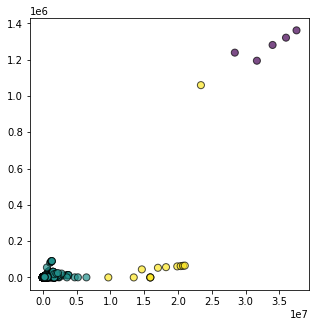

In [144]:
#Kmeans Visualization
x = df1['views'].values
y = df1['comment_count'].values
z = df1['cluster'].values
fig = plt.figure(figsize=(5, 5))
plt.scatter(x, y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 50,
           c=z)

plt.show()

In [145]:
fn = "generated_data.csv"
df2 = pd.read_csv(fn)
df2.head()

,category_id,views,comment_count,likes,dislikes
0,1,5298,786,2518,4028
1,10,9412,632,3523,4069
2,2,6041,245,1875,1279
3,22,6864,627,1457,3219
4,27,2718,834,2925,2094


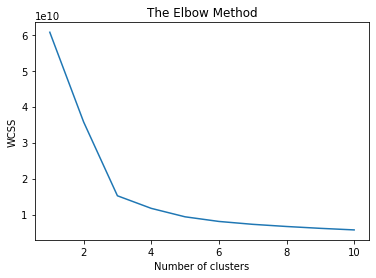

In [146]:
# Start clustering - use Elbow Method to find that the best cluster looks to be around 3
from sklearn.cluster import KMeans
cl = df2[['category_id', 'views', 'comment_count', 'likes', 'dislikes']]
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(cl)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [154]:
# Data fitting for kmeans
kmeans = KMeans(n_clusters = 4,init='k-means++',max_iter=200,n_init=10,random_state=0) 
y_k = kmeans.fit(cl)
y_k1 = kmeans.fit_predict(cl)
df2['c1'] = y_k1
print(df2.shape)
df2.head()

(2100, 7)


,category_id,views,comment_count,likes,dislikes,cluster,c1
0,1,5298,786,2518,4028,1,1
1,10,9412,632,3523,4069,1,1
2,2,6041,245,1875,1279,1,1
3,22,6864,627,1457,3219,1,1
4,27,2718,834,2925,2094,1,1


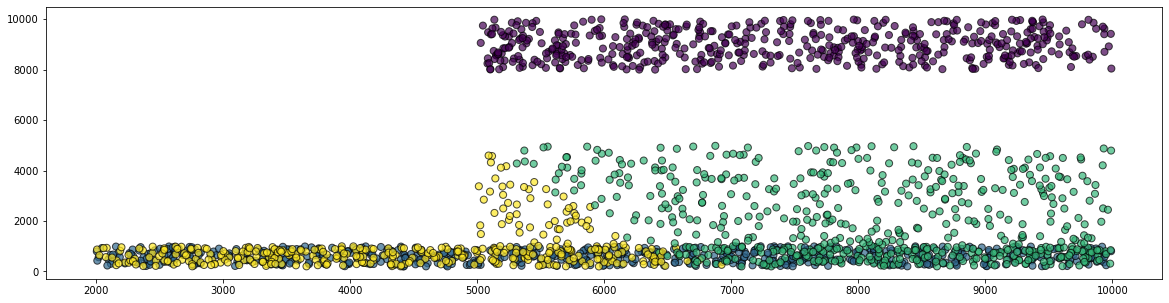

In [155]:
#Kmeans Visualization
import scipy, pylab

x = df2['views'].values
y = df2['comment_count'].values
z = df2['c1'].values
fig = plt.figure(figsize=(20, 5))
plt.scatter(x, y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 50,
           c=z)
# plt.xlim([0, 10000])
# plt.ylim([0, 10000])
# plt.xticks(np.arange(0, 10000, 1000))
# plt.yticks(np.arange(0, 100000, 10000))

plt.show()